# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Rafika Anandar
- **Email:** rrafikaan@gmail.com
- **ID Dicoding:** 28rafika

## Menentukan Pertanyaan Bisnis

1. Jam berapa penyewaan sepeda mencapai puncaknya dalam satu hari?
2. Pada bulan apa penyewaan sepeda paling tinggi dan paling rendah terjadi?
3. Bagaimana distribusi jumlah pengguna terdaftar dibandingkan dengan pengguna kasual dalam data penyewaan sepeda?
4. Berdasarkan tren cuaca, kapan sebaiknya disiapkan stok sepeda yang lebih banyak untuk memenuhi permintaan yang meningkat?

## Import Semua Packages/Library yang Digunakan

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [165]:
# load tabel day
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [166]:
# load tabel hour
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [167]:
# menilai data day & hour
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

In [168]:
# cek missing value pada data day
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [169]:
# cek missing value pada data hour
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [170]:
# cek duplikasi
print("Jumlah duplikasi hour df: ", hour_df.duplicated().sum())
print("Jumlah duplikasi day df: ", day_df.duplicated().sum())

Jumlah duplikasi hour df:  0
Jumlah duplikasi day df:  0


In [171]:
# melihat statistik data pada hour df
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [172]:
# melihat statistik data pada day df
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Tidak terdapat Missing value pada df hour & day
- Tidak terdapat duplikasi data pada df hour & day

### Cleaning Data

**Insight:**
- Mengubah nama kolom agar lebih mudah dibaca
- Menghapus kolom yang tidak digunakan seperti instant, atemp, dan working day (karena sudah terdapat weekday & holiday)
- Mengganti tipe data int menjadi categ dan dteday dari object menjadi datetime
- Mengganti data numerikal menjadi kategorikal pada kolom 'weekday', 'season', dan 'weathersit'
- Membuat kolom baru bernama 'Day_Categories' untuk mengelompokkan antara weekdays dan weekend

In [173]:
# mengubah nama kolom df hour
hour_df.rename(columns={
    'weekday': 'type_of_day',
    'yr': 'year',
    'mnth': 'month',
    'hum': 'humidity',
    'temp': 'temperature',
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'hum': 'humidity',
    'temp': 'temperature',
    'cnt': 'total_count',
    'hr': 'hour',
    'weathersit': 'weather'
}, inplace=True)

# mengubah nama kolom df day
day_df.rename(columns={
    'weekday': 'type_of_day',
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'hum': 'humidity',
    'temp': 'temperature',
    'cnt': 'total_count',
    'weathersit': 'weather'
}, inplace=True)

In [174]:
# drop kolom
hour_df.drop(columns=['instant', 'workingday', 'holiday', 'atemp'], inplace=True)
day_df.drop(columns=['instant', 'workingday', 'holiday', 'atemp'], inplace=True)

In [175]:
# mengubah tipe data
columns = ['season', 'type_of_day', 'weather', 'year']

for column in columns:
    day_df[column] =  day_df[column].astype("category")
    hour_df[column] =  hour_df[column].astype("category")

    hour_df['date'] = pd.to_datetime(hour_df['date'])
    day_df['date'] = pd.to_datetime(day_df['date'])

In [176]:
# mengganti data numerikal menjadi kategorikal

# kolom type_of_day = 0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat
hour_df.type_of_day.replace([0, 1, 2, 3, 4, 5, 6], ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], inplace=True)
day_df.type_of_day.replace([0, 1, 2, 3, 4, 5, 6], ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], inplace=True)

# Kolom month = 1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
day_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
hour_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

# kolom season = 1:spring, 2:summer, 3:fall, 4:winter
hour_df.season.replace([1, 2, 3, 4], ['spring', 'summer', 'fall', 'winter'], inplace=True)
day_df.season.replace([1, 2, 3, 4], ['spring', 'summer', 'fall', 'winter'], inplace=True)

# kolom weathersit = 1:clear, 2:cloudy, 3: light_rainSnow, 4:heavy_rainSnow
hour_df.weather.replace([1, 2, 3, 4], ['clear', 'cloudy', 'light_rainSnow', 'heavy_rainSnow'], inplace=True)
day_df.weather.replace([1, 2, 3, 4], ['clear', 'cloudy', 'light_rainSnow', 'heavy_rainSnow'], inplace=True)

# kolom year
hour_df.year.replace([0, 1], ['2011', '2012'], inplace=True)
day_df.year.replace([0, 1], ['2011', '2012'], inplace=True)

<ipython-input-176-49194c15babb>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hour_df.type_of_day.replace([0, 1, 2, 3, 4, 5, 6], ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], inplace=True)
<ipython-input-176-49194c15babb>:4: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  hour_df.

In [177]:
# membuat kolom baru bernama 'Day_Categories' untuk mengelompokkan weekend & weekdays pada kolom type_of_day
type_of_day = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
def get_categories(type_of_day):
    if type_of_day in ['Saturday', 'Sunday']:
        return 'weekend'
    else:
        return 'weekday'

hour_df['Day_Categories'] = hour_df['type_of_day'].apply(get_categories)
day_df['Day_Categories'] = day_df['type_of_day'].apply(get_categories)

In [178]:
hour_df.head()

,date,season,year,month,hour,type_of_day,weather,temperature,humidity,windspeed,casual,registered,total_count,Day_Categories
0,2011-01-01,spring,2011,Jan,0,Saturday,clear,0.24,0.81,0.0,3,13,16,weekend
1,2011-01-01,spring,2011,Jan,1,Saturday,clear,0.22,0.80,0.0,8,32,40,weekend
2,2011-01-01,spring,2011,Jan,2,Saturday,clear,0.22,0.80,0.0,5,27,32,weekend
3,2011-01-01,spring,2011,Jan,3,Saturday,clear,0.24,0.75,0.0,3,10,13,weekend
4,2011-01-01,spring,2011,Jan,4,Saturday,clear,0.24,0.75,0.0,0,1,1,weekend


In [179]:
day_df.head()

,date,season,year,month,type_of_day,weather,temperature,humidity,windspeed,casual,registered,total_count,Day_Categories
0,2011-01-01,spring,2011,Jan,Saturday,cloudy,0.344167,0.805833,0.160446,331,654,985,weekend
1,2011-01-02,spring,2011,Jan,Sunday,cloudy,0.363478,0.696087,0.248539,131,670,801,weekend
2,2011-01-03,spring,2011,Jan,Monday,clear,0.196364,0.437273,0.248309,120,1229,1349,weekday
3,2011-01-04,spring,2011,Jan,Tuesday,clear,0.200000,0.590435,0.160296,108,1454,1562,weekday
4,2011-01-05,spring,2011,Jan,Wednesday,clear,0.226957,0.436957,0.186900,82,1518,1600,weekday


In [194]:
# Concatenate day_df and hour_df vertically
all_df = pd.concat([day_df, hour_df], ignore_index=True)

# Now you can save it to CSV
all_df.to_csv("main_data.csv", index=False)

## Exploratory Data Analysis (EDA)

### Explore Data Hour

In [181]:
# melihat statistik data pada hour df
hour_df.describe(include="all")

,date,season,year,month,hour,type_of_day,weather,temperature,humidity,windspeed,casual,registered,total_count,Day_Categories
count,17379,17379,17379,17379,17379.000000,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379
unique,NaN,4,2,12,NaN,7,4,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,fall,2012,May,NaN,Saturday,clear,NaN,NaN,NaN,NaN,NaN,NaN,weekday
freq,NaN,4496,8734,1488,NaN,2512,11413,NaN,NaN,NaN,NaN,NaN,NaN,12365
mean,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,0.496987,0.627229,0.190098,35.676218,153.786869,189.463088,NaN
min,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN
25%,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,0.340000,0.480000,0.104500,4.000000,34.000000,40.000000,NaN
50%,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,0.500000,0.630000,0.194000,17.000000,115.000000,142.000000,NaN
75%,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,0.660000,0.780000,0.253700,48.000000,220.000000,281.000000,NaN
max,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,NaN


In [182]:
# penyewaan berdasarkan jam
hour_df.groupby(by="hour").agg({
    "total_count": "sum"
}).sort_values(by="total_count", ascending=False).head(5)

,total_count
hour,
17,336860
18,309772
8,261001
16,227748
19,226789


**Insight:**
- Berdasarkan rangkuman parameter statistik, kita memperoleh informasi jumlah pelanggan sebanyak 17.379 orang.
- Berdasarkan pivot table di atas, dapat diketahui bahwa penyewaan sepeda terbanyak di terdapat di jam 5 sore sedangkan penyewaan sepeda paling sedikit pada saat jam 4 pagi.

### Explore Data Day

In [183]:
# melihat statistik data pada day df
day_df.describe(include="all")

,date,season,year,month,type_of_day,weather,temperature,humidity,windspeed,casual,registered,total_count,Day_Categories
count,731,731,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731
unique,NaN,4,2,12,7,3,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,fall,2012,Jan,Sunday,clear,NaN,NaN,NaN,NaN,NaN,NaN,weekday
freq,NaN,188,366,62,105,463,NaN,NaN,NaN,NaN,NaN,NaN,521
mean,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,0.495385,0.627894,0.190486,848.176471,3656.172367,4504.348837,NaN
min,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,0.059130,0.000000,0.022392,2.000000,20.000000,22.000000,NaN
25%,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,0.337083,0.520000,0.134950,315.500000,2497.000000,3152.000000,NaN
50%,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,0.498333,0.626667,0.180975,713.000000,3662.000000,4548.000000,NaN
75%,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,0.655417,0.730209,0.233214,1096.000000,4776.500000,5956.000000,NaN
max,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,0.861667,0.972500,0.507463,3410.000000,6946.000000,8714.000000,NaN


In [184]:
# 1. penyewaan sepeda berdasarkan bulan
day_df.groupby(by="month").agg({
    "total_count": ["sum"]
}).sort_values(by=('total_count', 'sum'), ascending=False)

,total_count
,sum
month,
Aug,351194
Jun,346342
Sep,345991
Jul,344948
May,331686
Oct,322352
Apr,269094
Nov,254831


In [185]:
# 2. perbedaan jumlah penyewaan sepeda setiap tahun antara pengguna kasual dan pengguna terdaftar
day_df.groupby(by="year").agg({
    "registered": ["sum"],
    "casual": ["sum"]
})

<ipython-input-185-9ff3e403b5c8>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by="year").agg({


,registered,casual
,sum,sum
year,,
2011,995851,247252
2012,1676811,372765


In [186]:
# 3. penyewaan berdasarkan kondisi cuaca
day_df.groupby(by="weather").agg({
    "total_count": ["sum"]
})

<ipython-input-186-68e2f7d055e9>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by="weather").agg({


,total_count
,sum
weather,
clear,2257952
cloudy,996858
light_rainSnow,37869


**Insight:**
- Berdasarkan rangkuman parameter statistik, kita memperoleh informasi jumlah pelanggan sebanyak 17.379 orang.
- Berdasarkan pivot table 1, diketahui bahwa penyewaan sepeda paling banyak ada di bulan 8 (Agustus) sedangkan penyewaan paling sedikit di bulan 1 (Januari)
- Berdasarkan pivot table 2, diketahui bahwa penyewa tahun 2012 dengan status registered sebanyak 995851 sedangkan status casual hanya sebesar 247252
- Berdasarkan pivot table 3, diketahui bahwa pengguna lebih sering melakukan penyewaan sepeda pada saat cuaca cerah.


## Visualization & Explanatory Analysis

###Pertanyaan 1: Pada jam berapa penyewaan sepeda mencapai puncaknya dalam satu hari?

<ipython-input-187-c8d385d310ce>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="hour", y="total_count", data=top5_hour, palette=colors, ax=ax)


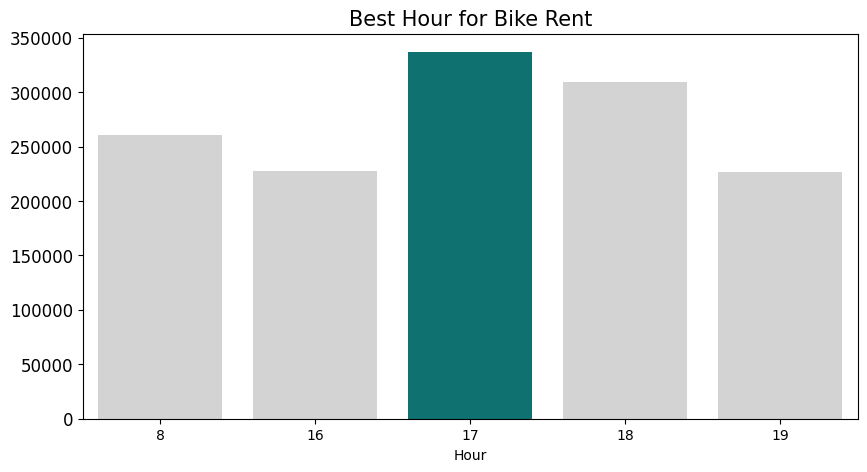

In [187]:
# Filter the top 5 rows by total_count
top5_hour = hour_df.groupby(by="hour").total_count.sum().sort_values(ascending=False).reset_index().head(5)

# visualisasi dalam bentuk bar chart menggunakan function subplot()
fig, ax = plt.subplots(figsize=(10, 5))

colors = ["#D3D3D3", "#D3D3D3", "#00827f", "#D3D3D3", "#D3D3D3"]
sns.barplot(x="hour", y="total_count", data=top5_hour, palette=colors, ax=ax)
ax.set_ylabel(None)
ax.set_xlabel("Hour", size=10)
ax.set_title("Best Hour for Bike Rent", loc="center", fontsize=15)
ax.tick_params(axis ='y', labelsize=12)

plt.show()

**Insight**: <br>
Jam 5 Sore adalah waktu terbaik untuk penyewaan sepeda dengan jumlah tertinggi dibandingkan jam-jam lainnya. Jam sibuk lainnya adalah jam 8 pagi dan jam 6 Sore.

### Pertanyaan 2: Pada bulan apa penyewaan sepeda paling tinggi dan paling rendah terjadi?


In [188]:
# membuat sebuah dataframe untuk menampung informasi
sum_rent_months_df = day_df.groupby(by="month").total_count.sum().sort_values(ascending=False).reset_index()
sum_rent_months_df.head(5)

,month,total_count
0,Aug,351194
1,Jun,346342
2,Sep,345991
3,Jul,344948
4,May,331686


<ipython-input-189-6938943118b9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="total_count", y="month", data=sum_rent_months_df.head(5), palette=colors, ax=ax[0])
<ipython-input-189-6938943118b9>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="total_count", y="month", data=sum_rent_months_df.sort_values(by="total_count", ascending=True).head(5), palette=colors, ax=ax[1])


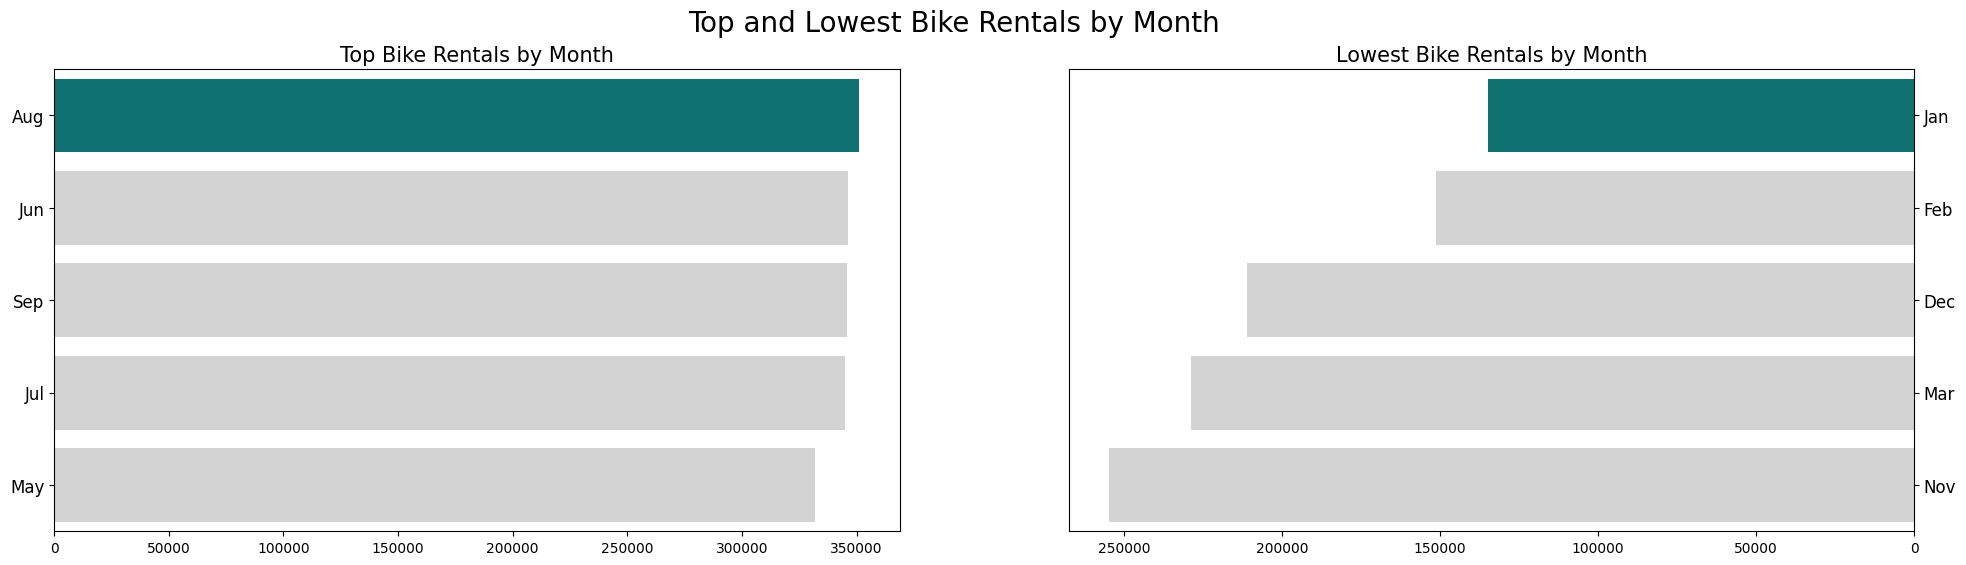

In [189]:
# visualisasi dalam bentuk bar chart menggunakan function subplot()
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#00827f", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(x="total_count", y="month", data=sum_rent_months_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Top Bike Rentals by Month", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="total_count", y="month", data=sum_rent_months_df.sort_values(by="total_count", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Lowest Bike Rentals by Month", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Top and Lowest Bike Rentals by Month", fontsize=20)
plt.show()

# ax [0] merupakan object untuk canvas pertama bagian kiri
# ax [1] merupakan object untuk canvas kedua bagian kanan

**Insight**: <br>
Bulan Agustus mencatat penyewaan sepeda tertinggi kemudian bulan Januari memiliki penyewaan sepeda terendah.

### Pertanyaan 3: Bagaimana distribusi jumlah pengguna terdaftar dibandingkan dengan pengguna kasual dalam data penyewaan sepeda?

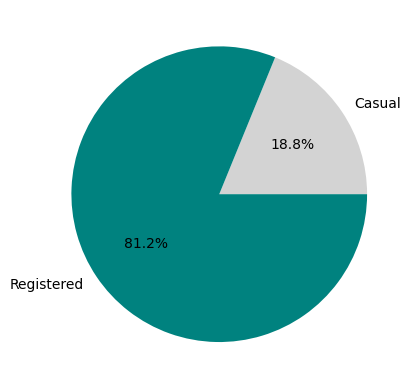

In [190]:
# Menjumlahkan semua elemen dalam kolom casual
total_casual = sum(day_df['casual'])

# Menjumlahkan semua elemen dalam kolom registered
total_registered = sum(day_df['registered'])

# Membuat data untuk pie plot
total_data = [total_casual, total_registered]
label_plt = ['Casual', 'Registered']
colors = ("#D3D3D3", "#00827f")

# Membuat pie plot
plt.pie(
    x=total_data,
    labels=label_plt,
    autopct='%1.1f%%',
    colors=colors,
)

# Menampilkan pie plot
plt.show()

**Insight**: <br>
Mayoritas pennyewa sepeda (81,2%) adalah pengguna terdaftar, sementara hanya 18,8% pengguna kasual. Hal ini menunjukkan dominasi pengguna yang berlangganan layanan.

###Pertanyaan 4: Berdasarkan tren cuaca, kapan sebaiknya disiapkan stok sepeda yang lebih banyak untuk memenuhi permintaan yang meningkat?

In [191]:
# membuat sebuah dataframe untuk menampung informasi
weather_data = day_df.groupby(by="weather").total_count.sum().sort_values(ascending=False).reset_index()
weather_data

<ipython-input-191-6e7dde078bc7>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_data = day_df.groupby(by="weather").total_count.sum().sort_values(ascending=False).reset_index()


,weather,total_count
0,clear,2257952
1,cloudy,996858
2,light_rainSnow,37869


<ipython-input-192-648e5eec876e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="weather", y="total_count",


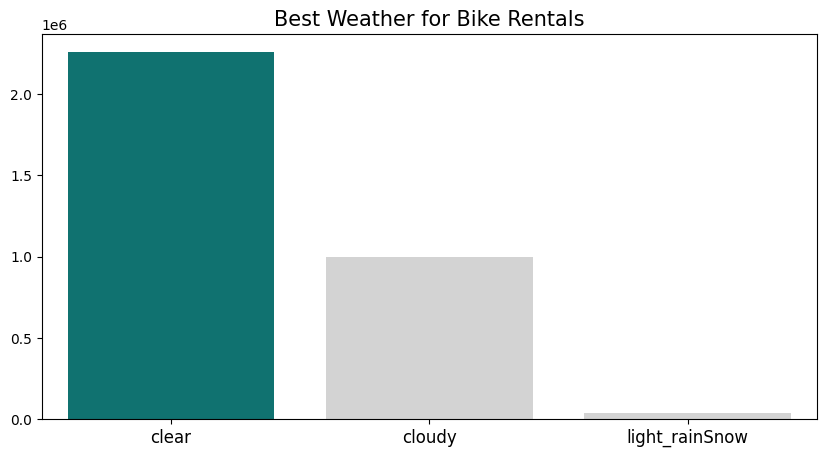

In [192]:
# visualisasi dalam bentuk bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x="weather", y="total_count",
            data=weather_data.sort_values(by="total_count", ascending=False), palette = ["#00827f", "#D3D3D3", "#D3D3D3"])

plt.title("Best Weather for Bike Rentals", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

**Insight**: <br>
Penyewaan sepeda tertinggi terjadi saat cuaca cerah, sedangkan cuaca mendung dan hujan ringan memiliki penyewaan jauh lebih rendah.

## Analisis Lanjutan (Clustering)
Untuk membuat clustering sederhana berdasarkan musim tanpa machine learning dapat menggunakan teknik **Manual Grouping**. Yaitu menentukan kriteria pengelompokan berdasarkan aturan bisnis atau pemahaman domain. Seperti pada kasus ini, kita dapat menggunakan kolom Day_Categories dan weather untuk mengelompokkan data, kemudian melakukan perhitungan rata-rata jumlah penyewaan (total_count)

<ipython-input-193-464271f9d86f>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = day_df.groupby(['Day_Categories', 'weather']).agg({


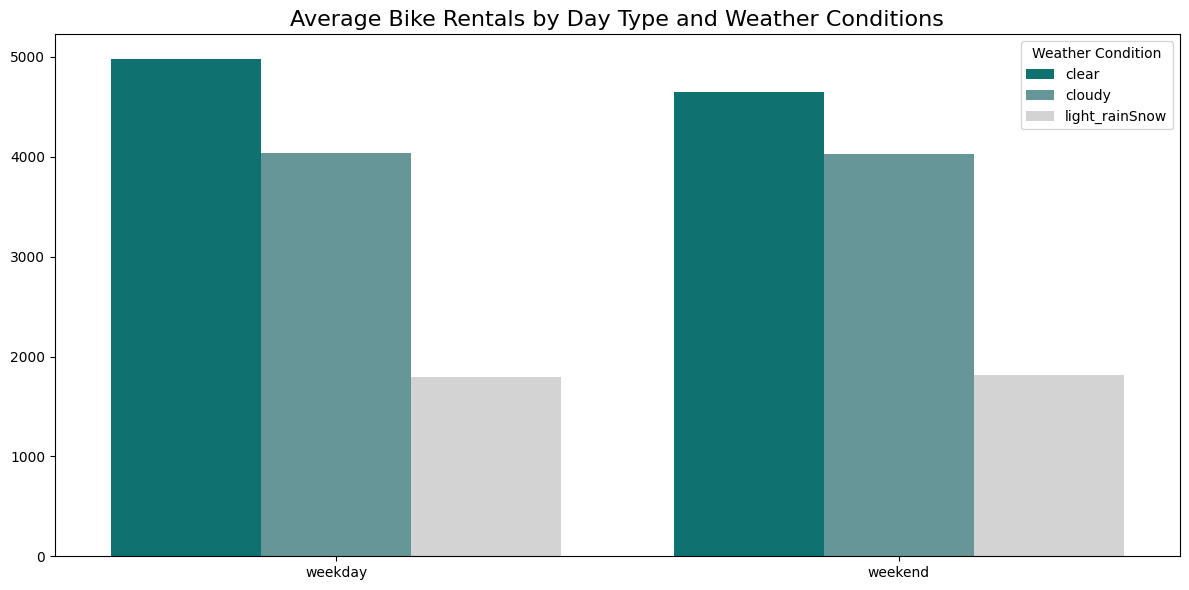

In [193]:
# Manual grouping
grouped_data = day_df.groupby(['Day_Categories', 'weather']).agg({
    'temperature': 'mean',
    'humidity': 'mean',
    'windspeed': 'mean',
    'total_count': 'mean'
}).reset_index()

# membuat plot dengan bivariate visualization
plt.figure(figsize=(12, 6))
sns.barplot(
    data=grouped_data,
    x='Day_Categories',
    y='total_count',
    hue='weather',
    palette= ["#00827f", "#5f9ea0", "#D3D3D3"]
)
plt.title('Average Bike Rentals by Day Type and Weather Conditions', fontsize=16)
plt.ylabel(None)
plt.xlabel(None)
plt.legend(title='Weather Condition', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

## Conclusion

**- Conclution pertanyaan 1 <br>**
Jam 5 sore adalah waktu dengan tingkat penyewaan sepeda tertinggi setiap harinya. Untuk itu, perusahaan perlu menambah ketersediaan sepeda serta menyiapkan tenaga kerja tambahan di waktu tersebut guna memastikan operasional berjalan lancar dan memenuhi permintaan.

**- Conclution pertanyaan 2 <br>**
Bulan Agustus memiliki tingkat penyewaan sepeda tertinggi, sementara bulan Januari memiliki tingkat penyewaan terendah. Perusahaan dapat meningkatkan ketersediaan sepeda dan layanan selama bulan Agustus, serta mengadakan promosi untuk menarik lebih banyak pengguna selama bulan Januari. <br>

**- Conclution pertanyaan 3 <br>**
Sebagian besar pengguna sepeda, yaitu 81.2%, adalah pelanggan terdaftar, sementara 18.8% adalah pengguna kasual. Strategi loyalitas seperti diskon berlangganan atau program penghargaan dapat meningkatkan retensi pelanggan terdaftar, sedangkan promosi menarik dapat mendorong pengguna kasual menjadi pelanggan tetap.

**- Conclution pertanyaan 4<br>**
Cuaca cerah adalah kondisi yang paling baik untuk penyewaan sepeda. Perusahaan perlu memantau ramalan cuaca dan memastikan stok sepeda yang memadai pada hari-hari dengan cuaca cerah, terutama selama akhir pekan atau musim liburan untuk mengantisipasi lonjakan permintaan.

**- Conclution analisis lanjutan menggunakan Clustering<br>**
Musim panas dengan cuaca cerah menghasilkan jumlah penyewaan paling tinggi, sementara musim dingin dengan hujan atau salju ringan memiliki jumlah penyewaan paling rendah. Perusahaan sebaiknya fokus meningkatkan ketersediaan sepeda selama musim panas dan musim gugur, terutama pada hari-hari dengan cuaca cerah, serta mempertimbangkan strategi promosi selama musim dingin untuk meningkatkan penyewaan.